## Import Relevant Packages


In [1]:
!pip install torchsummary

In [2]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torchvision
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torch.optim import lr_scheduler
import torch.nn.functional as F
import math
import os
import time
import copy
from torchsummary import summary
from torch.utils.tensorboard import SummaryWriter

## 1. Linear Regression from scratch

In [ ]:
# f = w*x
# f = 2*x

X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0

# model prediction
def forward(x):
  return w*x

# loss
def loss(y, y_predicted):
  return ((y_predicted-y)**2).mean()

# gradient
def gradient(x, y, y_predicted):
  return np.dot(2*x, y_predicted-y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 10

for epoch in range(n_iters):
  # prediction = forward pass
  y_pred = forward(X)

  # loss
  l = loss(Y, y_pred)

  # gradient
  dw = gradient(X, Y, y_pred)

  # update weights
  w -= learning_rate * dw

  if epoch % 1 == 0:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 2: w = 1.680, loss = 4.79999924
epoch 3: w = 1.872, loss = 0.76800019
epoch 4: w = 1.949, loss = 0.12288000
epoch 5: w = 1.980, loss = 0.01966083
epoch 6: w = 1.992, loss = 0.00314574
epoch 7: w = 1.997, loss = 0.00050331
epoch 8: w = 1.999, loss = 0.00008053
epoch 9: w = 1.999, loss = 0.00001288
epoch 10: w = 2.000, loss = 0.00000206
Prediction after training: f(5) = 9.999


## Linear Regression (gradient with pytorch)

In [ ]:
# f = w*x
# f = 2*x

X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
  return w*x

# loss
def loss(y, y_predicted):
  return ((y_predicted-y)**2).mean()


print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
  # prediction = forward pass
  y_pred = forward(X)

  # loss
  l = loss(Y, y_pred)

  # gradients = backward pass
  l.backward() # dl/dw

  # update weights
  with torch.no_grad():
    w -= learning_rate * w.grad

  # zero gradients
  w.grad.zero_()

  if epoch % 10  == 0:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


## 2. Training Pipeline Model/Loss/Optimization

1) Design model (inout, output size, forward pass)

2) Construct loss and optimizer

3) Training loop

 - forward pass : compute prediction
 - backward pass : gradients
 - update weights

In [ ]:
# f = w*x
# f = 2*x

X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
  return w*x


print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 100

# MSELoss is a callable function that takes y_true and y_pred as parameters
loss = nn.MSELoss()

# We will optimize the parameter w
optimizer = torch.optim.SGD([w], lr=learning_rate)

for epoch in range(n_iters):
  # prediction = forward pass
  y_pred = forward(X)

  # The loss is still the same because it's a callable function
  l = loss(Y, y_pred)

  # gradients = backward pass
  l.backward() # dl/dw

  # We don't need to update manually our weights anymore
  optimizer.step()

  # zero gradients
  optimizer.zero_grad()

  if epoch % 10  == 0:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


### Use implemented torch model

In [ ]:
# f = w*x
# f = 2*x

X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)


X_test = torch.tensor([5], dtype=torch.float32)
# Get the shape
n_samples, n_features = X.shape

# Construct a model
input_size = n_features
output_size = n_features

# Linear is a callable function that takes X as a parameter and returns the rsult of forward pass
model = nn.Linear(input_size, output_size)


print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

# Training
learning_rate = 0.01
n_iters = 100

# MSELoss is a callable function
loss = nn.MSELoss()

# We don't have explicit weights now. Instead, we have the model's parameters
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
  # prediction = forward pass
  y_pred = model(X)

  # The loss is still the same because it's a callable function
  l = loss(Y, y_pred)

  # gradients = backward pass
  l.backward() # dl/dw

  # We don't need to update manually our weights anymore
  optimizer.step()

  # zero gradients
  optimizer.zero_grad()

  if epoch % 10  == 0:
    [w, b] = model.parameters()
    print(f'epoch {epoch+1}: w = {w[0][0]:.3f}, b = {b[0]:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

Prediction before training: f(5) = 3.123
epoch 1: w = 0.654, b = 0.865, loss = 12.16952896
epoch 11: w = 1.457, b = 1.100, loss = 0.53136796
epoch 21: w = 1.596, b = 1.109, loss = 0.21765824
epoch 31: w = 1.627, b = 1.083, loss = 0.19767314
epoch 41: w = 1.642, b = 1.052, loss = 0.18597826
epoch 51: w = 1.653, b = 1.021, loss = 0.17514855
epoch 61: w = 1.663, b = 0.991, loss = 0.16495383
epoch 71: w = 1.673, b = 0.962, loss = 0.15535264
epoch 81: w = 1.683, b = 0.933, loss = 0.14631025
epoch 91: w = 1.692, b = 0.906, loss = 0.13779423
Prediction after training: f(5) = 9.382


### Create Custommized Model Class

In [ ]:
# f = w*x
# f = 2*x

X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)


X_test = torch.tensor([5], dtype=torch.float32)
# Get the shape
n_samples, n_features = X.shape

# Construct a model
input_size = n_features
output_size = n_features

# Linear is a callable function that takes X as a parameter and returns the rsult of forward pass
class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()

    # define layers
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)

model = LinearRegression(input_size, output_size)

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

# Training
learning_rate = 0.01
n_iters = 100

# MSELoss is a callable function
loss = nn.MSELoss()

# We don't have explicit weights now. Instead, we have the model's parameters
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
  # prediction = forward pass
  y_pred = model(X)

  # The loss is still the same because it's a callable function
  l = loss(Y, y_pred)

  # gradients = backward pass
  l.backward() # dl/dw

  # We don't need to update manually our weights anymore
  optimizer.step()

  # zero gradients
  optimizer.zero_grad()

  if epoch % 10  == 0:
    [w, b] = model.parameters()
    print(f'epoch {epoch+1}: w = {w[0][0]:.3f}, b = {b[0]:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

Prediction before training: f(5) = 2.637
epoch 1: w = 0.570, b = 0.875, loss = 14.07674789
epoch 11: w = 1.434, b = 1.128, loss = 0.59320748
epoch 21: w = 1.583, b = 1.140, loss = 0.23102668
epoch 31: w = 1.617, b = 1.114, loss = 0.20910281
epoch 41: w = 1.631, b = 1.082, loss = 0.19671252
epoch 51: w = 1.643, b = 1.050, loss = 0.18525711
epoch 61: w = 1.653, b = 1.019, loss = 0.17447419
epoch 71: w = 1.664, b = 0.989, loss = 0.16431874
epoch 81: w = 1.674, b = 0.960, loss = 0.15475452
epoch 91: w = 1.683, b = 0.931, loss = 0.14574708
Prediction after training: f(5) = 9.365


## 3. Linear Regression with Pytorch

epoch: 10, loss = 4470.6792
epoch: 20, loss = 3335.6360
epoch: 30, loss = 2513.7605
epoch: 40, loss = 1918.0453
epoch: 50, loss = 1485.8521
epoch: 60, loss = 1172.0232
epoch: 70, loss = 943.9609
epoch: 80, loss = 778.1037
epoch: 90, loss = 657.4037
epoch: 100, loss = 569.5118


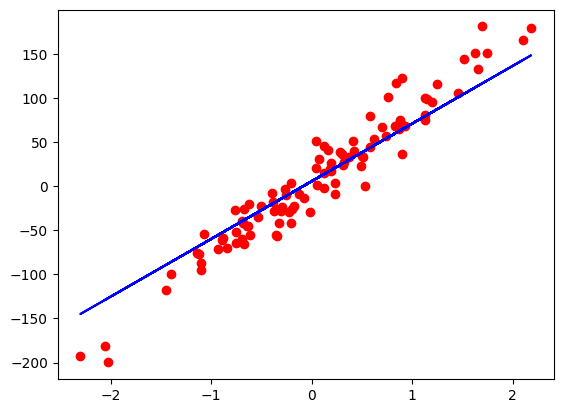

In [ ]:
# 0) prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise = 20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

# 1) model
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

# 2) loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
  # forward pass and loss
  y_predicted = model(X)
  loss = criterion(y_predicted, y)

  # backward pass
  loss.backward()

  # update
  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')

## 4. Logistic Regression with pytorch

In [ ]:
# 0) prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

# 1) model : f = sig(xw+b)
class LogisticRegression(nn.Module):
  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(n_input_features, 1)

  def forward(self, x):
    y_predicted = torch.sigmoid(self.linear(x))
    return y_predicted

model = LogisticRegression(n_features)

# 2) loss and optimizer
learning_rate = 0.01

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
  # forward pass and loss
  y_predicted = model(X_train)
  loss = criterion(y_predicted, y_train)

  # backward pass
  loss.backward()

  # updates
  optimizer.step()

  # zero gradients
  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# Model evaluation
with torch.no_grad():
  y_predicted = model(X_test)
  y_predicted_cls = y_predicted.round()
  acc = y_predicted_cls.eq(y_test).sum()/float(y_test.shape[0])
  print(f'accuracy = {acc:.4f}')


epoch: 10, loss = 0.5608
epoch: 20, loss = 0.4699
epoch: 30, loss = 0.4101
epoch: 40, loss = 0.3678
epoch: 50, loss = 0.3362
epoch: 60, loss = 0.3114
epoch: 70, loss = 0.2913
epoch: 80, loss = 0.2747
epoch: 90, loss = 0.2605
epoch: 100, loss = 0.2483
accuracy = 0.8860


## 5. Dataset & DataLoader
epoch = 1 forward and backward pass of ALL training samples

batch_size = number of training samples in one forward & backward pass

number of iterations = number of passes, each pass using [batch size] numberof samples

e.g. 100 samples, batch_size = 20 ==> 100/20 = 5 iteration for each 1 epoch

In [ ]:
class WineDataset(Dataset):
  def __init__(self):
    # data loading
    xy = np.loadtxt('wine.csv', delimiter=",", dtype=np.float32, skiprows=1)
    self.x = torch.from_numpy(xy[:, 1:])
    self.y = torch.from_numpy(xy[:, [0]]) # n_samples, 1
    self.n_samples = xy.shape[0]

  def __getitem__(self, index):
    # dataset[0]
    return self.x[index], self.y[index]

  def __len__(self):
    return self.n_samples

dataset = WineDataset()
dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=2)

# training loop
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)
print(total_samples, n_iterations)

for epoch in range(num_epochs):
  for i, (input, labels) in enumerate(dataloader):
    # forward backward, update
    if (i+1)%5 == 0:
      print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_iterations}, inputs {input.shape}')


178 45
epoch 1/2, step 5/45, inputs torch.Size([4, 13])
epoch 1/2, step 10/45, inputs torch.Size([4, 13])
epoch 1/2, step 15/45, inputs torch.Size([4, 13])
epoch 1/2, step 20/45, inputs torch.Size([4, 13])
epoch 1/2, step 25/45, inputs torch.Size([4, 13])
epoch 1/2, step 30/45, inputs torch.Size([4, 13])
epoch 1/2, step 35/45, inputs torch.Size([4, 13])
epoch 1/2, step 40/45, inputs torch.Size([4, 13])
epoch 1/2, step 45/45, inputs torch.Size([2, 13])
epoch 2/2, step 5/45, inputs torch.Size([4, 13])
epoch 2/2, step 10/45, inputs torch.Size([4, 13])
epoch 2/2, step 15/45, inputs torch.Size([4, 13])
epoch 2/2, step 20/45, inputs torch.Size([4, 13])
epoch 2/2, step 25/45, inputs torch.Size([4, 13])
epoch 2/2, step 30/45, inputs torch.Size([4, 13])
epoch 2/2, step 35/45, inputs torch.Size([4, 13])
epoch 2/2, step 40/45, inputs torch.Size([4, 13])
epoch 2/2, step 45/45, inputs torch.Size([2, 13])


## 6. Dataset Transforms

In [ ]:
class WineDataset(Dataset):
  def __init__(self, transform=None):
    # data loading
    xy = np.loadtxt('wine.csv', delimiter=",", dtype=np.float32, skiprows=1)
    self.x = xy[:, 1:]
    self.y = xy[:, [0]] # n_samples, 1
    self.n_samples = xy.shape[0]

    self.transform = transform

  def __getitem__(self, index):
    sample = self.x[index], self.y[index]

    if self.transform:
      sample = self.transform(sample)

    return sample

  def __len__(self):
    return self.n_samples

# callable object
class ToTensor:
  def __call__(self, sample):
    inputs, targets = sample
    return torch.from_numpy(inputs), torch.from_numpy(targets)

class MulTransform:
  def __init__(self, factor):
    self.factor = factor

  def __call__(self, sample):
    inputs, target = sample
    inputs *= self.factor
    return inputs, target


dataset = WineDataset(transform=ToTensor())
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), type(labels))

composed = torchvision.transforms.Compose([ToTensor(), MulTransform(4 )])
dataset = WineDataset(transform=composed)
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), type(labels))



tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([5.6920e+01, 6.8400e+00, 9.7200e+00, 6.2400e+01, 5.0800e+02, 1.1200e+01,
        1.2240e+01, 1.1200e+00, 9.1600e+00, 2.2560e+01, 4.1600e+00, 1.5680e+01,
        4.2600e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>


## 7. Softmax & Crossentropy
```
Softmax ==> nn.CrossEntropyLoss()
binary classification ==> nn.BCELoss()
```

In [ ]:
loss = nn.CrossEntropyLoss()
Y = torch.tensor([2])
# nsamples x nclasses = 1x3
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]])
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(l1.item())
print(l2.item())

_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(predictions1)
print(predictions2)

2.3170299530029297
2.040616273880005
tensor([0])
tensor([1])


### Multi-class Model
When we use Crossentropy loss, we don't use softmax layer since it's corporated inside.

In [ ]:
class NeuralNet2(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet2, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)

    # no softmax at the end
    return out

model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss() # (applies softmax)

### Binary Class Model

In [ ]:
class NeuralNet1(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(NeuralNet1, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size,1)

  def forward(self, x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)

    # sigmoid at the end
    y_pred = torch.sigmoid(out)

    return out

model = NeuralNet1(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss()

## 8. Activation Functions

1. **Step function**
2. **Sigmoid**
3. **TanH**
4. **ReLU**
5. **Leaky ReLU** : Improved version of ReLU. Tries to solve the vanishing gradient problem
6. **Softmax**

We have two ways to use them in Pytorch.

### Option 01 :
It corresponds to what we have seen earlier. We first define all the layers in the init method, then we call them  inside the forward method. In this case, we consider them as separated layer.

In [ ]:
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(NeuralNet, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size,1)

  def forward(self, x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)

    # sigmoid at the end
    out = torch.sigmoid(out)

    return out

### Option 02 :
We can use them directly in the forward method. In this case, the activation functions are incorporated in the same nodes of the same layer. They are directly available in `torch` API. Sometimes they are available in `torch.nn.functional`

In [ ]:
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(NeuralNet, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.linear2 = nn.Linear(hidden_size,1)

  def forward(self, x):
    out = torch.relu(self.linear1(x))
    out = torch.sigmoid(self.linear2(out))

    return out

## 9. Feed-Forward Neural Net

1. MNIST
2. DataLoader
3. Multilayer Neural Net
4. Loss & Optimizer
5. Training Loop (batch training)
6. Model evaluation
7. GPU support

100%|██████████| 9912422/9912422 [00:00<00:00, 225309636.23it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 114494984.71it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 123657048.29it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 21722381.72it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

torch.Size([100, 1, 28, 28]) torch.Size([100])


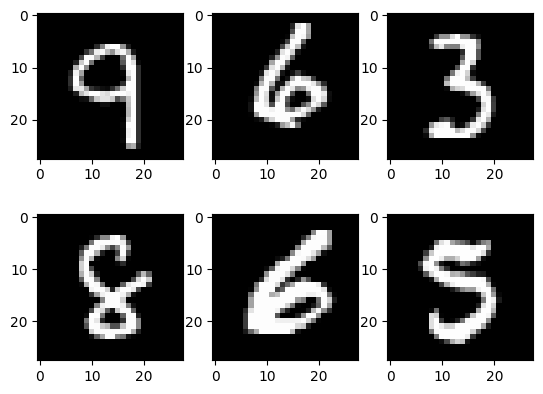

epoch 1/2, step 100/600, loss = 0.6751
epoch 1/2, step 200/600, loss = 0.3019
epoch 1/2, step 300/600, loss = 0.3147
epoch 1/2, step 400/600, loss = 0.3555
epoch 1/2, step 500/600, loss = 0.2907
epoch 1/2, step 600/600, loss = 0.2604
epoch 2/2, step 100/600, loss = 0.1908
epoch 2/2, step 200/600, loss = 0.1995
epoch 2/2, step 300/600, loss = 0.2124
epoch 2/2, step 400/600, loss = 0.1480
epoch 2/2, step 500/600, loss = 0.1688
epoch 2/2, step 600/600, loss = 0.1563
accuracy = 95.47


In [ ]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper parameters
input_size = 784 # 28x28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(samples[i][0], cmap='gray')
plt.show()

class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)

    return out

model = NeuralNet(input_size, hidden_size, num_classes)

#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # 100, 1, 28, 28
    # 100 784
    # push the tensor to the GPU is available
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    # forward pass
    outputs = model(images).to(device)
    loss = criterion(outputs, labels)

    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

# test
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)

    # value, index
    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()

  acc = 100.0 * n_correct / n_samples
  print(f'accuracy = {acc}')

## 10. CNN with pytorch

In [ ]:
# Device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
num_epochs = 4
batch_size = 4
learning_rate = 0.001

# dataset has PILImage images of range [0, 1]
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck')

# implement conv net
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2= nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)


  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)

    return x



model = ConvNet()

#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # origin shape: [4, 3, 32, 32] = 4, 3, 1024
    # input_layer : 3 input channels, 6 output channels, 5 kernel size
    # push the tensor to the GPU is available
    images = images.to(device)
    labels = labels.to(device)

    # forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 2000 == 0:
      print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

print('Finished Training')

# test
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  n_class_correct = [0 for i in range(10)]
  n_class_samples = [0 for i in range(10)]

  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)

    # max returns (value, index)
    _, predicted = torch.max(outputs, 1)
    n_samples += labels.size(0)
    n_correct += (predicted == labels).sum().item()

    for i in range(batch_size):
      label = labels[i]
      pred = predicted[i]
      if(label == pred):
        n_class_correct[label] += 1
      n_class_samples[label] += 1

  acc = 100.0 * n_correct / n_samples
  print(f'Accuracy of the network = {acc} %')

  for i in range(10):
    acc = 100.0 * n_class_correct[i] / n_class_samples[i]
    print(f'Accuracy of {classes[i]}: {acc} %')

100%|██████████| 170498071/170498071 [00:01<00:00, 103564424.69it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
epoch 1/4, step 2000/12500, loss = 2.3143
epoch 1/4, step 4000/12500, loss = 2.2867
epoch 1/4, step 6000/12500, loss = 2.2951
epoch 1/4, step 8000/12500, loss = 2.2886
epoch 1/4, step 10000/12500, loss = 2.2987
epoch 1/4, step 12000/12500, loss = 2.2615
epoch 2/4, step 2000/12500, loss = 2.4778
epoch 2/4, step 4000/12500, loss = 2.0207
epoch 2/4, step 6000/12500, loss = 2.4254
epoch 2/4, step 8000/12500, loss = 1.7778
epoch 2/4, step 10000/12500, loss = 1.7282
epoch 2/4, step 12000/12500, loss = 2.1344
epoch 3/4, step 2000/12500, loss = 1.4435
epoch 3/4, step 4000/12500, loss = 1.6730
epoch 3/4, step 6000/12500, loss = 2.5885
epoch 3/4, step 8000/12500, loss = 1.2581
epoch 3/4, step 10000/12500, loss = 1.1053
epoch 3/4, step 12000/12500, loss = 1.7308
epoch 4/4, step 2000/12500, loss = 1.1944
epoch 4/4, step 4000/12500, loss = 1.0707
epoch 4/4, step 6000/12500, loss = 1.4289
epoch 4/4, step 8000/12500, loss = 1.0080
epoch 4/4, step 100

## 11. Transfer Learning

### Scheduler
```python
# Every 7 epochs, our learning rate is multiplied by gamma
step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
...
for epoch in range(num_epochs):
  for i in range(iterations):
    ...
    optimizer.step()
    ...
  step_lr_schedular.step()
```

### Transfer Learning
```python
model = models.resnet18(pretrained=True)

# View model architecture
summary(model, input_shape)

# Access a specific layer
model.layer_name

# Access the parameters of the model
model.parameters()

# Access the parameters of the layer
model.layer_name.parameters()

# Freez the layer
for param in model.layer_name.parameters():
  param.requires_grad = False

# Freez the parameters of the model
for param in model.parameters():
  param.requires_grad = False
```

The command `model.layer.parameters()` returns two tensors. One represents the *weights*, the other one represents the *biases*

In [24]:
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2= nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)


  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)

    return x

model = ConvNet()
model.fc1.requires_grad_ = False
for param in model.fc1.parameters():
  param.requires_grad = False

## 12. Tensorboard

In [2]:
!pip install tensorboard

Epoch [1/1], Step [100/938], Loss: 0.2461
Epoch [1/1], Step [200/938], Loss: 0.1468
Epoch [1/1], Step [300/938], Loss: 0.2078
Epoch [1/1], Step [400/938], Loss: 0.2254
Epoch [1/1], Step [500/938], Loss: 0.2102
Epoch [1/1], Step [600/938], Loss: 0.1792
Epoch [1/1], Step [700/938], Loss: 0.1813
Epoch [1/1], Step [800/938], Loss: 0.3528
Epoch [1/1], Step [900/938], Loss: 0.1033
Accuracy of the network on the 10000 test images: 96.14 %


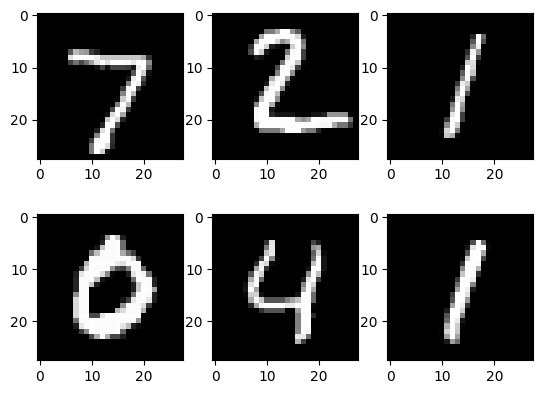

In [3]:
## TENSORBOARD

# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/mnist1')
###################################################

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 784 # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 1
batch_size = 64
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = next(examples)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
#plt.show()

############## TENSORBOARD ########################
img_grid = torchvision.utils.make_grid(example_data)
writer.add_image('mnist_images', img_grid)
#writer.close()
#sys.exit()
###################################################

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

############## TENSORBOARD ########################
writer.add_graph(model, example_data.reshape(-1, 28*28).to(device))
#writer.close()
#sys.exit()
###################################################

# Train the model
running_loss = 0.0
running_correct = 0
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        running_correct += (predicted == labels).sum().item()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
            ############## TENSORBOARD ########################
            writer.add_scalar('training loss', running_loss / 100, epoch * n_total_steps + i)
            running_accuracy = running_correct / 100 / predicted.size(0)
            writer.add_scalar('accuracy', running_accuracy, epoch * n_total_steps + i)
            running_correct = 0
            running_loss = 0.0
            ###################################################

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
class_labels = []
class_preds = []
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        values, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        class_probs_batch = [F.softmax(output, dim=0) for output in outputs]

        class_preds.append(class_probs_batch)
        class_labels.append(labels)

    # 10000, 10, and 10000, 1
    # stack concatenates tensors along a new dimension
    # cat concatenates tensors in the given dimension
    class_preds = torch.cat([torch.stack(batch) for batch in class_preds])
    class_labels = torch.cat(class_labels)

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

    ############## TENSORBOARD ########################
    classes = range(10)
    for i in classes:
        labels_i = class_labels == i
        preds_i = class_preds[:, i]
        writer.add_pr_curve(str(i), labels_i, preds_i, global_step=0)
        writer.close()
    ###################################################

In [4]:
%load_ext tensorboard
%tensorboard --logdir runs/mnist1

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2023-08-27 19:14:29.295595: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Traceback (most recent call last):
  File "/usr/local/bin/tensorboard", line 8, in <module>
    sys.exit(run_main())
  File "/usr/local/lib/python3.10/dist-packages/tensorboard/main.py", line 46, in run_main
    app.run(tensorboard.main, flags_parser=tensorboard.configure)
  File "/usr/local/lib/python3.10/dist-packages/absl/app.py", line 308, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.10/dist-packages/absl/app.py", line 254, in _run_main
    sys.exit(main(argv))
  File "/usr/local/lib/python3.10/dist-packages/tensorboard/program.py", line 276, in main
    return runner(self.flags)

## 13. Saving and Loading Models
**Option 01 :**
```python
#### COMPLETE MODEL ####
torch.save(arg, PATH)

# model class must be defined somwhere
model = torch.load(PATH)
model.eval()
```

**Option 02 :**
```python
#### STATE DICT ####
# We saved the whole parameters of the model (dictionnary)
torch.save(model.state_dict(), PATH)

# model must be created again with parameters
# 1. First we create model object
# 2. We load the dictionnary of parameters
# 3. Set our model to evaluation mode
model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.eval()
```

The problem with the first option, is that the model should be in the same structure with which it's saved, so as to be correctely loaded.

The recommended way to save our model is the second option.

In [3]:
# OPTION 01
class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model(n_input_features=6)
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
print(optimizer.state_dict())

# create a checkpoint
checkpoint = {
    "epoch" : 90,
    "model_state" : model.state_dict(),
    "optim_state" : optimizer.state_dict()
}

# in pytorch we can save any dictionnary. We use this advantage to create a checkpoints
torch.save(checkpoint, "checkpoint.pth")

{'state': {}, 'param_groups': [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'params': [0, 1]}]}


In [4]:
loaded_checkpoint = torch.load("checkpoint.pth")

In [6]:
print(loaded_checkpoint)
model = Model(n_input_features=6)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epoch = loaded_checkpoint["epoch"]
model.load_state_dict(loaded_checkpoint["model_state"])
optimizer.load_state_dict(loaded_checkpoint["optim_state"])

{'epoch': 90, 'model_state': OrderedDict([('linear.weight', tensor([[-0.3100, -0.3003, -0.3130,  0.2657, -0.0290,  0.0737]])), ('linear.bias', tensor([-0.3047]))]), 'optim_state': {'state': {}, 'param_groups': [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'params': [0, 1]}]}}


### Save and Load on a specific device

```python
# Save on GPU, Load on CPU
device = torch.device("cuda")
model.to(device)
torch.save(model.state_dict(), PATH)

device = torch.device('cpu')
model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH, map_location=device))
```


```python
# Save on GPU, Load on GPU
device = torch.device("cuda")
model.to(device)
torch.save(model.state_dict(), PATH)

model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.to(device)
```

```python
# Save on CPU, Load on GPU
torch.save(model.state_dict(), PATH)

device = torch.device("cuda")
model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH, map_location="cuda:0"))
model.to(device)
```